___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# NLP (Natural Language Processing) и Обучение с учителем (Supervised Learning)
## Классификация текстовых данных

### Данные

Источник: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

Эти данные изначально были получены из библиотеки "Crowdflower's Data for Everyone".

#### Цель: создать алгоритм машинного обучения, который для нового твита будет определять его эмоциональную окраску - позитивный, нейтральный или негативный твит. Такой алгоритм можно будет применять для автоматического чтения твитов и поиска тех твитов, на которые следует обратить внимание службе поддержки клиентов той или иной авиакомпании.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DATA/airline_tweets.csv")

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<AxesSubplot:xlabel='airline', ylabel='count'>

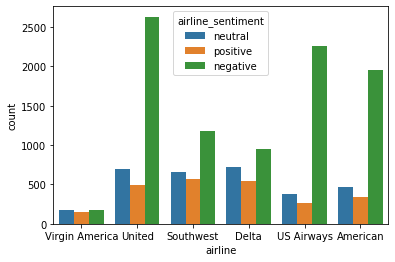

In [4]:
sns.countplot(data=df,x='airline',hue='airline_sentiment')

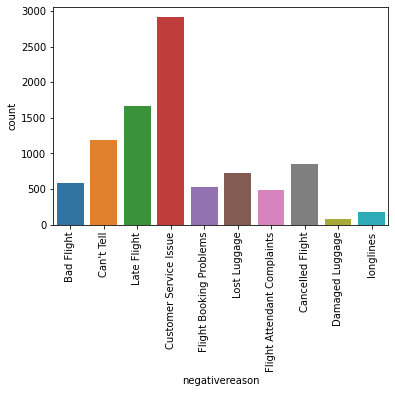

In [5]:
sns.countplot(data=df,x='negativereason')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

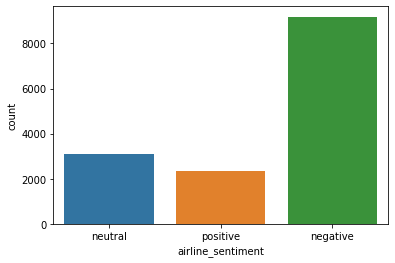

In [6]:
sns.countplot(data=df,x='airline_sentiment')

In [7]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

## Признаки и целевая переменная

In [8]:
data = df[['airline_sentiment','text']]

In [9]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [10]:
y = df['airline_sentiment']
X = df['text']

### Разбиение на обучающий и тестовый наборы данных - Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Векторизация

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tfidf = TfidfVectorizer(stop_words='english')

In [15]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [16]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [17]:
X_train_tfidf

<11712x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 107073 stored elements in Compressed Sparse Row format>

**НЕ ЗАПУСКАЙТЕ .todense() для такой большой разреженной матрицы!**

## Сравнение моделей - Naive Bayes, LogisticRegression, LinearSVC 

In [18]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [19]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [20]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC()

## Оценка работы модели

In [21]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [22]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

NB MODEL
              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



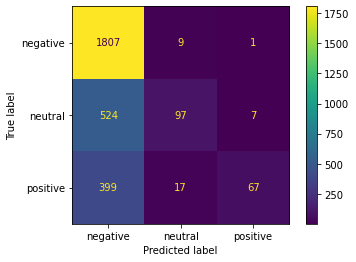

In [23]:
print("NB MODEL")
report(nb)

Logistic Regression
              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.82      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



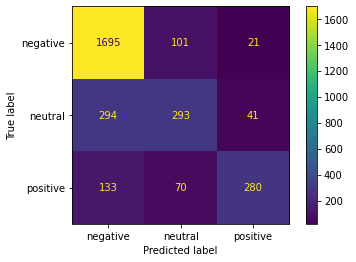

In [24]:
print("Logistic Regression")
report(log)

SVC
              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



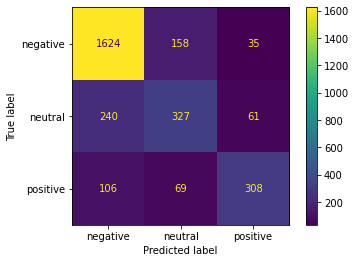

In [25]:
print('SVC')
report(svc)

### Создание пайплайна для применения к новым твитам

После того, как мы получили хорошо работающую модель, давайте создадим пайплайн, который можно будет применять напрямую к входным текстовым данным (твитам).

In [26]:
from sklearn.pipeline import Pipeline

In [27]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [28]:
pipe.fit(df['text'],df['airline_sentiment'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [29]:
new_tweet = ['good flight']
pipe.predict(new_tweet)

array(['positive'], dtype=object)

In [30]:
new_tweet = ['bad flight']
pipe.predict(new_tweet)

array(['negative'], dtype=object)

In [31]:
new_tweet = ['ok flight']
pipe.predict(new_tweet)

array(['neutral'], dtype=object)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/airline_tweets.csv')

In [4]:
df.head().T

,0,1,2,3,4
tweet_id,570306133677760513,570301130888122368,570301083672813571,570301031407624196,570300817074462722
airline_sentiment,neutral,positive,neutral,negative,negative
airline_sentiment_confidence,1.0,0.3486,0.6837,1.0,1.0
negativereason,NaN,NaN,NaN,Bad Flight,Can't Tell
negativereason_confidence,NaN,0.0,NaN,0.7033,1.0
airline,Virgin America,Virgin America,Virgin America,Virgin America,Virgin America
airline_sentiment_gold,NaN,NaN,NaN,NaN,NaN
name,cairdin,jnardino,yvonnalynn,jnardino,jnardino
negativereason_gold,NaN,NaN,NaN,NaN,NaN
retweet_count,0,0,0,0,0


<Axes: xlabel='airline_sentiment', ylabel='count'>

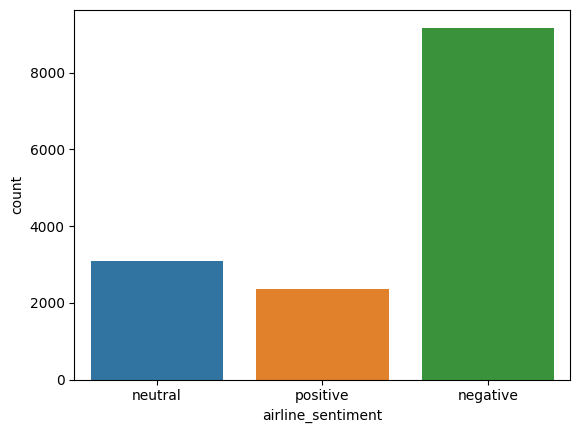

In [6]:
sns.countplot(data=df, x='airline_sentiment' , hue='airline_sentiment')

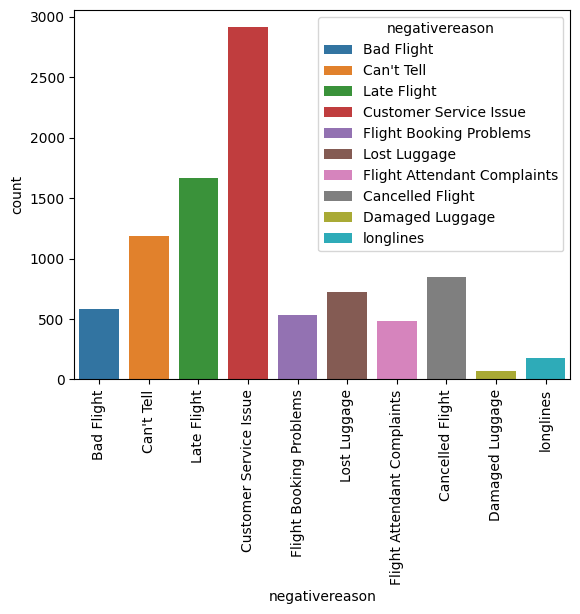

In [10]:
sns.countplot(data=df, x='negativereason', hue='negativereason')
plt.xticks(rotation=90);

<Axes: xlabel='airline', ylabel='count'>

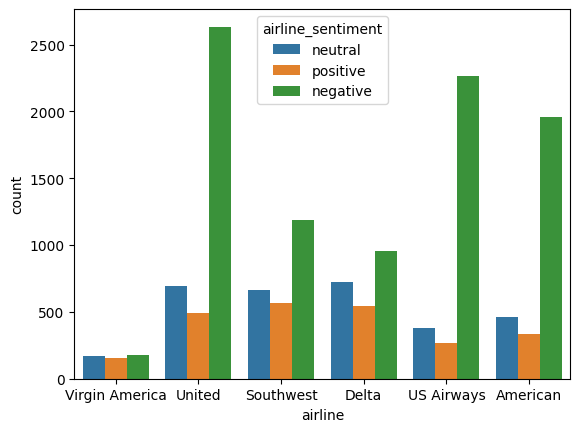

In [11]:
sns.countplot(data=df, x='airline', hue='airline_sentiment')

In [12]:
data = df[['airline_sentiment', 'text']]

In [13]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [14]:
X = data['text']
y = data['airline_sentiment']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf = TfidfVectorizer(stop_words='english')

In [19]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [20]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [22]:
X_train_tfidf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
nb = MultinomialNB()

In [25]:
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [55]:
nb.predict(['Good flight'])

ValueError: Expected 2D array, got 1D array instead:
array=['Good flight'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [26]:
from sklearn.linear_model import LogisticRegression

In [29]:
log_model = LogisticRegression(max_iter=1000)

In [30]:
log_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [31]:
from sklearn.svm import SVC, LinearSVC 

In [32]:
rbf_svc = SVC()

In [33]:
rbf_svc.fit(X_train_tfidf, y_train)

SVC()

In [34]:
linear_svc = LinearSVC()

In [35]:
linear_svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [42]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test, preds))
    ConfusionMatrixDisplay.from_estimator(model, X_test_tfidf, y_test)

              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



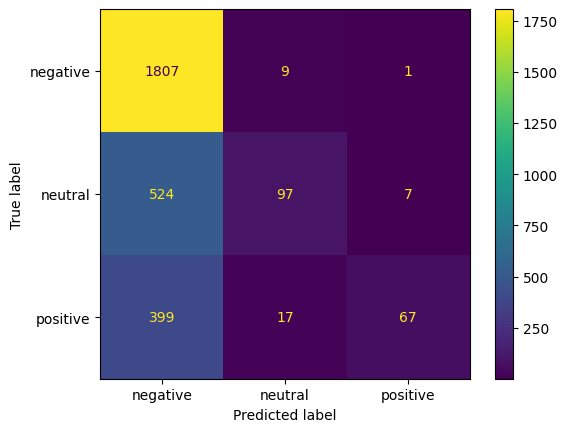

In [43]:
report(nb)

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.81      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



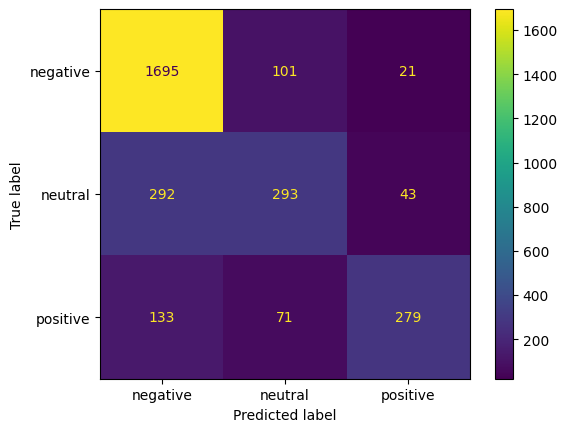

In [44]:
report(log_model)

              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



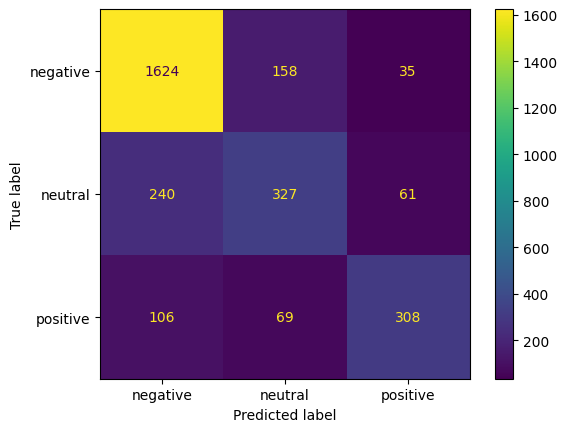

In [46]:
report(linear_svc)

In [47]:
from sklearn.pipeline import Pipeline

In [49]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('svc', LinearSVC())])

In [50]:
pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [51]:
pipe.predict(['good flight'])

array(['positive'], dtype=object)

In [56]:
pipe.predict(['ok flight'])

array(['neutral'], dtype=object)

              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      1817
     neutral       0.67      0.41      0.51       628
    positive       0.81      0.56      0.66       483

    accuracy                           0.77      2928
   macro avg       0.75      0.64      0.67      2928
weighted avg       0.76      0.77      0.75      2928



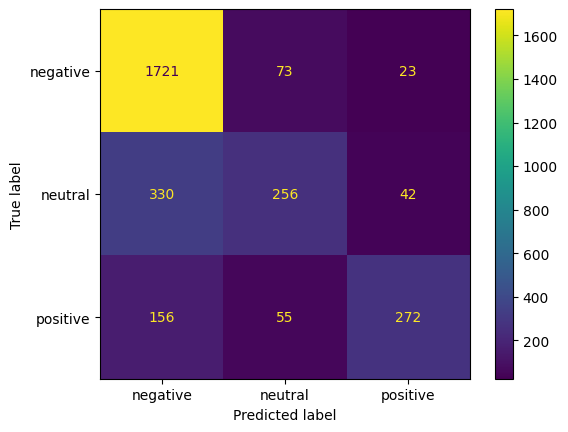

In [57]:
report(rbf_svc)